## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,Binarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor
from sklearn.metrics import accuracy_score,plot_confusion_matrix,plot_roc_curve,mean_squared_error
plt.style.use('fivethirtyeight')


In [2]:
df_data = pd.read_csv('Data/Carseats.csv')
df_data_to_model = df_data.copy()
df_data_to_model['High'] = df_data_to_model.Sales.map(lambda x: 1 if x > 8 else 0)
df_data_to_model.info()
df_data_to_model.head(n=2)
df_data_to_model.ShelveLoc.value_counts()
df_data_to_model['ShelveLoc'] = pd.factorize(df_data_to_model.ShelveLoc)[0]
df_data_to_model['Urban'] = df_data_to_model.Urban.map({'No':0, 'Yes':1})
df_data_to_model['US'] = df_data_to_model.US.map({'No':0, 'Yes':1})
df_data_to_model.drop(['Sales'],axis =1,inplace=True)
df_data_to_model.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  High         400 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


## Split train/test

In [3]:
test,train =  train_test_split(df_data_to_model,train_size=0.8, random_state= 0,stratify= df_data_to_model.High)
feature_columns = list(test.columns)
feature_columns.remove('High')
X_train, y_train = train.loc[:,feature_columns], train.High
X_test, y_test = test.loc[:,feature_columns], test.High

## Decision Tree

In [4]:
classification_tree_carseats = DecisionTreeClassifier(max_depth=6)
classification_tree_carseats.fit(X_train,y_train)
classification_tree_carseats.score(X_train,y_train)

1.0

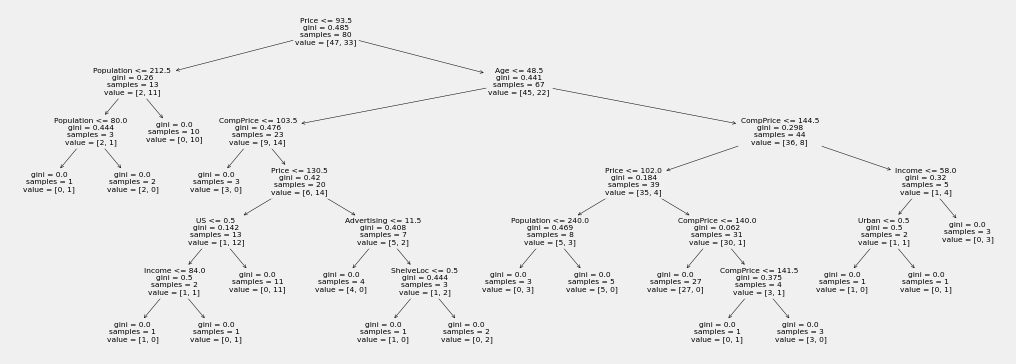

In [5]:
fig,axs = plt.subplots(1,1, figsize = (16,6))
plot_tree(classification_tree_carseats, ax = axs,feature_names = feature_columns)
plt.show()

In [6]:
accuracy_score(y_test,classification_tree_carseats.predict(X_test))

0.640625

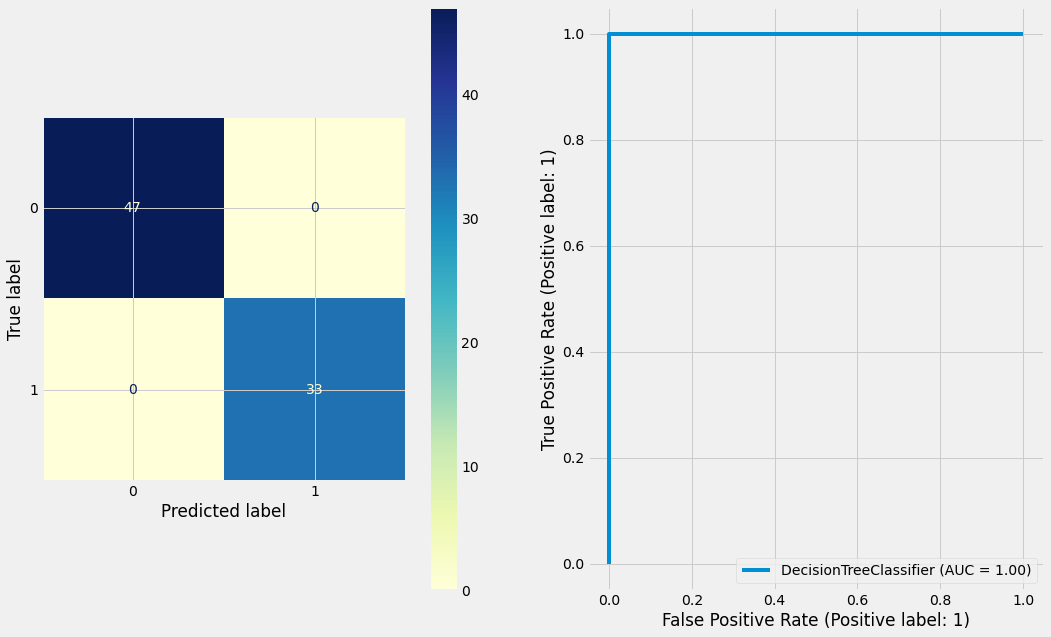

In [7]:
fig,axs = plt.subplots(1,2,figsize = (16,10))
plot_confusion_matrix(classification_tree_carseats,X_train,y_train,ax = axs[0],cmap= 'YlGnBu')
plot_roc_curve(classification_tree_carseats,X_train,y_train,ax = axs [1])
plt.show()

## Regresion Tree

In [8]:
df_boston = pd.read_csv('Data/Boston.csv')
df_boston_to_model = df_boston.copy()
df_boston_to_model.head(n=2)
feature_columns = list(df_boston_to_model.columns)
feature_columns.remove('medv')
df_boston_to_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
train, test = train_test_split(df_boston_to_model, train_size= 0.8, random_state=0)
X_train,y_train = train.loc[:,feature_columns],train.medv
X_test,y_test = test.loc[:,feature_columns],test.medv


In [10]:
reg_tree_model = DecisionTreeRegressor(max_depth=2)
reg_tree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

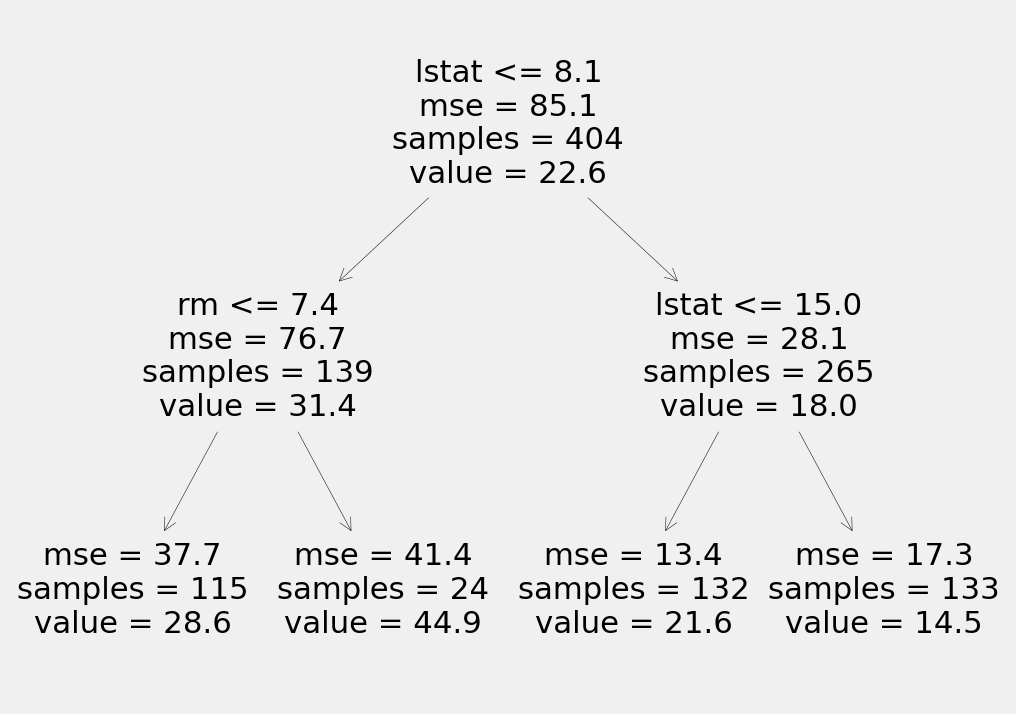

In [11]:
fig,axs = plt.subplots(1,1, figsize = (16,12))
plot_tree(reg_tree_model,precision=1,ax=axs,feature_names= X_train.columns )
plt.show()

In [12]:
print('test MSE',mean_squared_error(y_test,reg_tree_model.predict(X_test)))

test MSE 35.406215828790245


## Bagging and Random Forest

In [13]:
bagged_model = BaggingRegressor(random_state=1,oob_score=True,verbose=1,n_estimators=1000,n_jobs=-1)
bagged_model.fit(X_train,y_train)
print('OOB score',bagged_model.oob_score_)
print('Train MSE', mean_squared_error(y_train,bagged_model.predict(X_train)))
print('Test MSE', mean_squared_error(y_test,bagged_model.predict(X_test)))

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    2.5s remaining:   12.3s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.6s finished


OOB score 0.8828212572771197


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.1s remaining:    0.3s


Train MSE 1.368495665618811
Test MSE 19.10218371862746


[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.2s finished


In [14]:
random_forest_model = RandomForestRegressor(n_estimators=1000,oob_score=True,random_state=1,verbose=1,max_features = None,n_jobs=-1)
random_forest_model.fit(X_train,y_train)
print('OOB score',random_forest_model.oob_score_)
print('Train MSE', mean_squared_error(y_train,random_forest_model.predict(X_train)))
print('Test MSE', mean_squared_error(y_test,random_forest_model.predict(X_test)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.9s finished


OOB score 0.8826932759556645
Train MSE 1.3702187006188105
Test MSE 19.363647957745236


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [15]:
random_forest_model = RandomForestRegressor(n_estimators=100,oob_score=True,random_state=1,verbose=1,max_features = 'log2',n_jobs=-1)
random_forest_model.fit(X_train,y_train)
print('OOB score',random_forest_model.oob_score_)
print('Train MSE', mean_squared_error(y_train,random_forest_model.predict(X_train)))
print('Test MSE', mean_squared_error(y_test,random_forest_model.predict(X_test)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


OOB score 0.9012857699314362
Train MSE 1.14269538118812
Test MSE 24.96197964705883


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


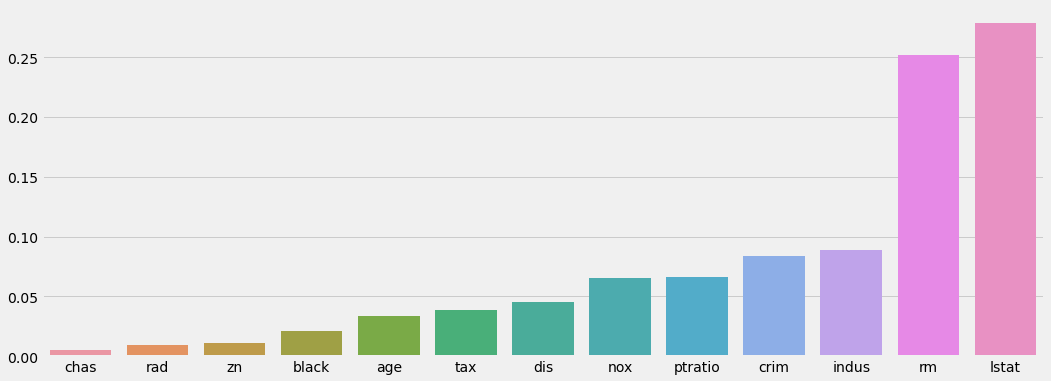

In [16]:
ser_to_plot = pd.Series(random_forest_model.feature_importances_, index = feature_columns)
ser_to_plot.sort_values(inplace=True)

fig,axs = plt.subplots(1,1, figsize = (16,6))
sns.barplot(y= ser_to_plot.values,x=  ser_to_plot.index, ax = axs)
plt.show()

## Boosting